<a href="https://colab.research.google.com/github/samykebaish/cs5010_data_analysis_project/blob/main/Project_Code_Group10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
%matplotlib inline
sns.set_style("darkgrid")

# Mental Health CLD Data Set 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Read in data
#The dataset for df_mental is found at https://drive.google.com/file/d/1j8M2wP24Vt81RBXK6jtPo4LFBi0J2van/view?usp=sharing it is too big for github. 
df_mental = pd.read_csv(r'/content/drive/MyDrive/CS5010/MHCLD_reduced.csv') #dataset in CSV
df_states_mental = pd.read_csv('https://raw.githubusercontent.com/samykebaish/cs5010_data_analysis_project/main/gfiles/statefip.csv') #spreadsheet page with the codes for states df_mental dataframe
df_MH1 = pd.read_csv("https://raw.githubusercontent.com/samykebaish/cs5010_data_analysis_project/main/gfiles/mh1.csv")
df_age_label = pd.read_csv("https://raw.githubusercontent.com/samykebaish/cs5010_data_analysis_project/main/gfiles/age.csv")

### Data Cleaning

Not much to clean, just missing values of the variables of interest.

In [ ]:
#Adding text to key variables.  The original data is coded.
#State names
df_mental_states = df_mental.merge(df_states_mental, left_on="STATEFIP", right_on="Value") #Value and STATEFIP should be equal
df_mental_states = df_mental_states.drop(['Value'], axis=1) #remove Value column in an effort to try and keep the massive file smaller

#Diagnosis Names
df_mental_labeled = df_mental_states.merge(df_MH1, left_on="MH1", right_on="Value")
df_mental_labeled = df_mental_labeled.drop(['Value'], axis=1)

#age labels
df_mental_labeled = df_mental_labeled.merge(df_age_label, left_on="AGE", right_on="Value")
df_mental_labeled = df_mental_labeled.drop(['Value'], axis=1)
df_mental_labeled.tail()

,YEAR,AGE,RACE,MH1,STATEFIP,State,Label,Age_Range
6213786,2018,-9,-9,12,53,Washington,Alcohol or substance use disorders,Missing/Unknown/not collected/invalid
6213787,2018,-9,-9,12,53,Washington,Alcohol or substance use disorders,Missing/Unknown/not collected/invalid
6213788,2018,-9,-9,12,53,Washington,Alcohol or substance use disorders,Missing/Unknown/not collected/invalid
6213789,2018,-9,-9,12,99,Other Jurisdictions,Alcohol or substance use disorders,Missing/Unknown/not collected/invalid
6213790,2018,-9,-9,12,99,Other Jurisdictions,Alcohol or substance use disorders,Missing/Unknown/not collected/invalid


In [ ]:
#Creating a dataset that removes some of the missing values.  This are used in later analysis and analysis on the total number of cases is performed on 
#the dataframe that has not been reduced. 
#remove any unknown variables in the State column
df_states_pov = df_mental_labeled.loc[df_mental_labeled['STATEFIP'] != 99] #remove other jurisdiction from dataset to only focus on states
#df_states_pov = df_states_pov.loc[df_states_pov['STATEFIP'] != 72]
df_states_pov = df_states_pov.loc[df_states_pov['AGE'] != -9]#remove Puetro Rico from dataset to focus on states 
df_states_pov.sort_values(by=['STATEFIP'])
df_states_pov.tail() #the df is sorted by STATEFIP

,YEAR,AGE,RACE,MH1,STATEFIP,State,Label,Age_Range
6209715,2018,2,5,12,54,West Virginia,Alcohol or substance use disorders,12-14
6209716,2018,2,5,12,54,West Virginia,Alcohol or substance use disorders,12-14
6209717,2018,2,5,12,55,Wisconsin,Alcohol or substance use disorders,12-14
6209718,2018,2,-9,12,72,Puerto Rico,Alcohol or substance use disorders,12-14
6209719,2018,2,5,12,72,Puerto Rico,Alcohol or substance use disorders,12-14


Puerto Rico dropped


In [ ]:
def remove_puerto_rico(df):
    df = df[df['STATEFIP'] != 72]
    df = df.reset_index(drop=True)
    return df

In [ ]:
remove_puerto_rico(df_states_pov)

,YEAR,AGE,RACE,MH1,STATEFIP,State,Label,Age_Range
0,2018,7,6,6,1,Alabama,Bipolar disorders,30-34
1,2018,7,5,6,1,Alabama,Bipolar disorders,30-34
2,2018,7,3,6,1,Alabama,Bipolar disorders,30-34
3,2018,7,5,6,1,Alabama,Bipolar disorders,30-34
4,2018,7,5,6,1,Alabama,Bipolar disorders,30-34
...,...,...,...,...,...,...,...,...
6206411,2018,2,3,12,54,West Virginia,Alcohol or substance use disorders,12-14
6206412,2018,2,5,12,54,West Virginia,Alcohol or substance use disorders,12-14
6206413,2018,2,5,12,54,West Virginia,Alcohol or substance use disorders,12-14
6206414,2018,2,5,12,54,West Virginia,Alcohol or substance use disorders,12-14


Exploritory Data - What are some key varaibles?

Text(0, 0.5, 'Number of Mental Health Cases')

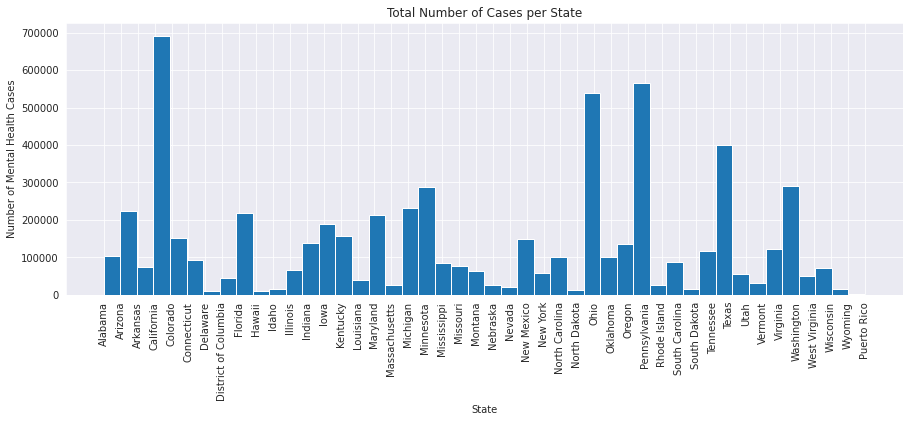

In [ ]:
#Number of Cases per State
plt.rcParams["figure.figsize"] = (15,5)
plt.hist(df_states_pov['State'],bins = 46)
plt.xticks(rotation=90)
plt.title('Total Number of Cases per State')
plt.xlabel('State')
plt.ylabel('Number of Mental Health Cases')

States with highest totals are California, Ohio, and Pennsylvania

## Single Variable Analysis

Age

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fafb5af6710>,
      dtype=object)

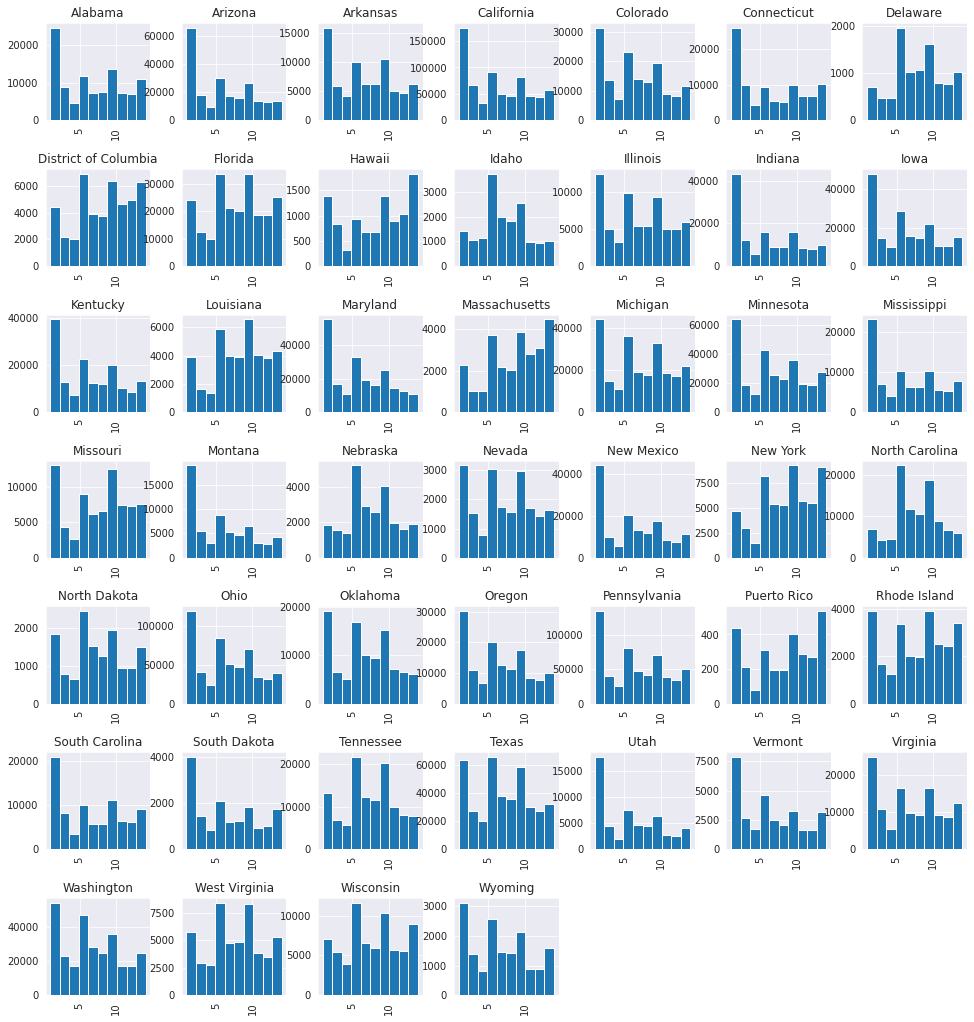

In [ ]:
#using the dataset with missing age data removed. 
df_states_pov['AGE'].hist(by = df_states_pov['State'], figsize = (16,18)) # did not to the column with the labels as this is exploratory

The age group 1 seems to have a large number of states wtih a high total, does that hold up over all?

In [ ]:
age = df_states_pov.groupby('State')['Age_Range'].value_counts().to_frame() #create dataframe taht totals up teh cases by age
age = age.reset_index(0)

In [ ]:
age.rename(columns={age.columns[1]: "total"}, inplace=True) #rename the column after moving to dataframe
new_age = age.reset_index()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 <a list of 14 Text major ticklabel objects>)

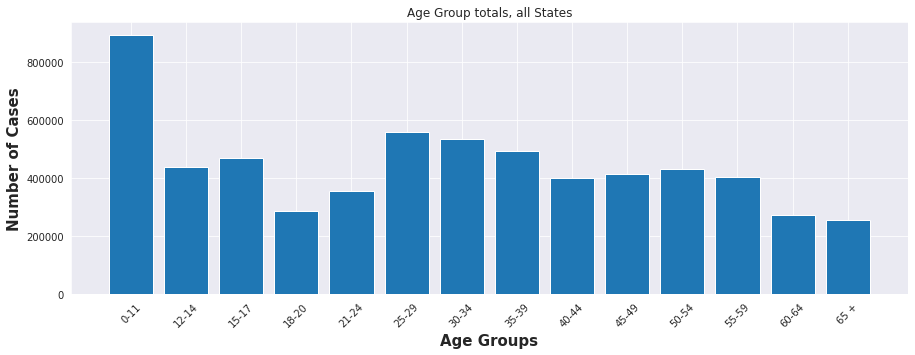

In [ ]:
#totals per age group, no states
Totals_per_group = age.groupby('Age_Range')['total'].sum().to_frame().reset_index()
plt.bar(Totals_per_group['Age_Range'], Totals_per_group['total'])
plt.xlabel('Age Groups', fontweight ='bold', fontsize = 15)
plt.ylabel('Number of Cases', fontweight ='bold', fontsize = 15)
plt.title('Age Group totals, all States')
plt.xticks(rotation=45)

Group 1 (Ages 0-11) have the highest number of cases overall.

Primary Mental Health Diagnosis

What is the breakdown of mental health diagnoses per state?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fafb2f0f410>,
      dtype=object)

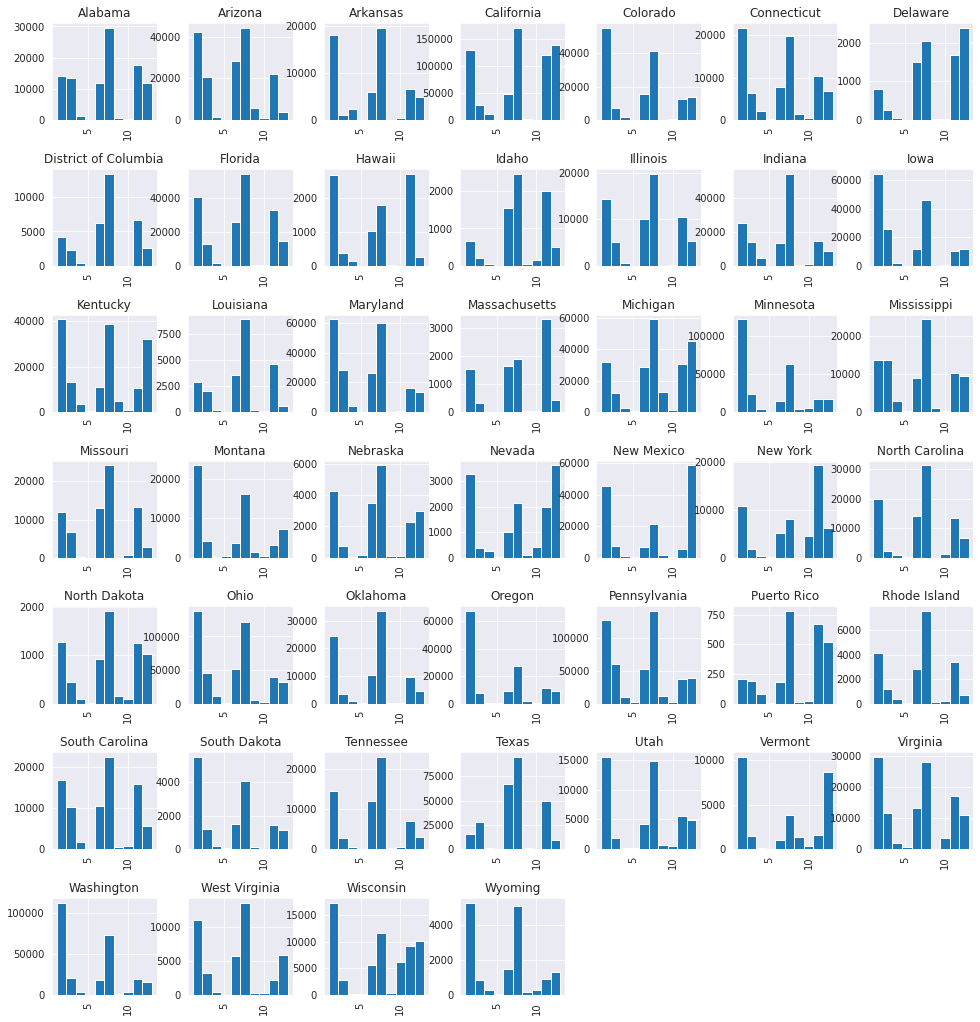

In [ ]:
#using the dataset with missing MH1 data removed. 
df_states_mh1 = df_states_pov.loc[df_states_pov['MH1'] != -9]
df_states_mh1['MH1'].hist(by = df_states_mh1['State'], figsize = (16,18)) # did not to the column with the labels as this is exploratory

Quite a few with with low diagnosis, what are the totals over all?

In [ ]:
mh1 = df_states_mh1.groupby('State')['Label'].value_counts().to_frame() #create dataframe taht totals up teh cases by age
mh1.rename(columns={mh1.columns[0]: "total"}, inplace=True)
mh1 = mh1.reset_index()
mh1.head()

,State,Label,total
0,Alabama,Depressive disorders,27590
1,Alabama,Schizophrenia or other psychotic disorders,17751
2,Alabama,ADD/ADHA,13668
3,Alabama,Other disorders/conditions,11864
4,Alabama,Bipolar disorders,11830


Text(0.5, 1.0, 'Mental Health Cases per Diagnosis')

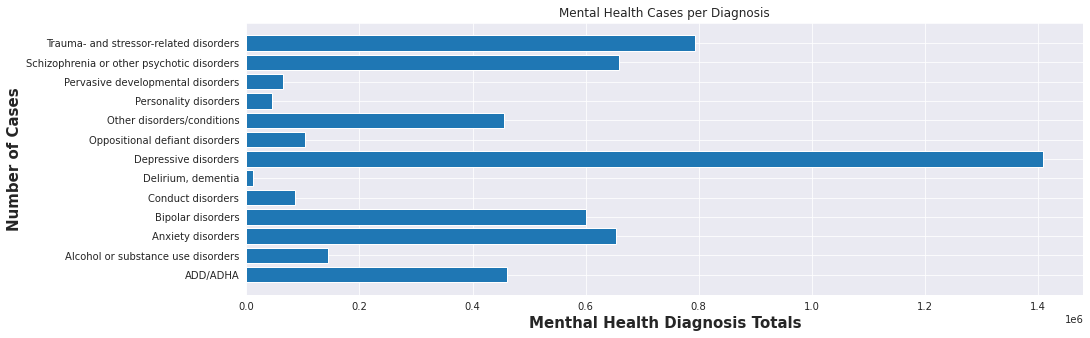

In [ ]:
#totals per mh1, no states
Totals_per_mh1 = mh1.groupby('Label')['total'].sum().to_frame().reset_index()
plt.barh(Totals_per_mh1['Label'], Totals_per_mh1['total'])
plt.xlabel('Menthal Health Diagnosis Totals', fontweight ='bold', fontsize = 15)
plt.ylabel('Number of Cases', fontweight ='bold', fontsize = 15)
plt.title('Mental Health Cases per Diagnosis')

Over all, it seems that depressive disorders are the main diagnosis, How does that apply on a state by state basis?

## Multivariable Analysis

How do mental health diagnosis vary by Age Group?

In [ ]:
#Dataset with missing data of the primary health diagnosis removed and arranged for graphing
df_mental_labeled1 = df_mental_labeled.loc[df_mental_labeled['AGE'] != -9] 
age_mh1 = df_mental_labeled1.groupby('Age_Range')['Label'].value_counts().to_frame()
age_mh1.rename(columns={age_mh1.columns[0]: 'Total_Cases' }, inplace = True)
age_mh1 = age_mh1.reset_index()

In [ ]:
#create a dataframe with both age and Mh1 along with their totals, and change the label to diagnosis
age_mh1 = age_mh1.rename(columns={"Label" : "Diagnosis"})
age_mh1.head()

,Age_Range,Diagnosis,Total_Cases
0,0-11,ADD/ADHA,232353
1,0-11,Trauma- and stressor-related disorders,227728
2,0-11,Other disorders/conditions,91534
3,0-11,Missing/Unknown,88932
4,0-11,Anxiety disorders,84127


[Text(0, 0.5, 'Age Range'), Text(0.5, 0, 'Number of Cases')]

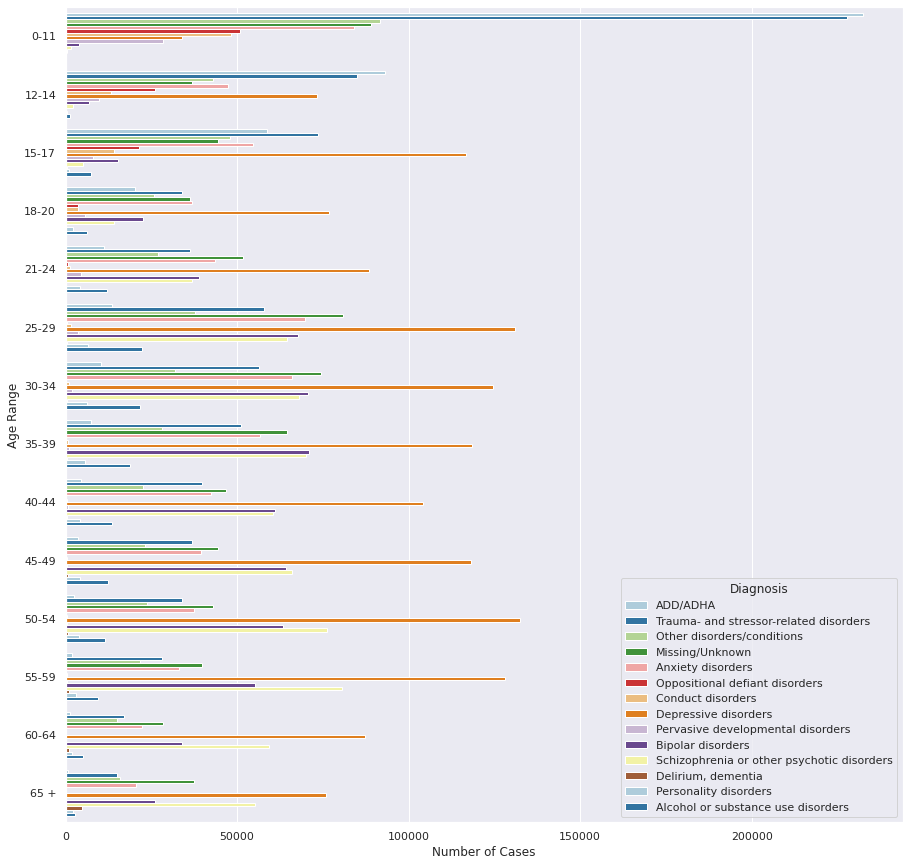

In [ ]:
sns.set(rc={'figure.figsize':(15,15)})
sns.color_palette("vlag", as_cmap=True)
ax = sns.barplot(y="Age_Range", x="Total_Cases", hue="Diagnosis", data=age_mh1, palette = 'Paired')
ax.set(xlabel='Number of Cases', ylabel='Age Range')

## Unit Test

In [ ]:
#Test to see if puerto rico was removed

import unittest
from pandas._testing import assert_frame_equal

class PuertoRicoTestCase(unittest.TestCase): # inherit from unittest.TestCase
    
    def test_can_remove_puerto_rico(self):
        data_removed = [['Kansas', 54], ['Utah', 14]]
        correct_df = pd.DataFrame(data_removed, columns = ['State', 'STATEFIP'])
        
        data = [['Puerto Rico', 72], ['Kansas', 54], ['Utah', 14]]
        test_df = pd.DataFrame(data, columns = ['State', 'STATEFIP'])
        test_df.reset_index()
        
        new_df = remove_puerto_rico(test_df)
        
        assert_frame_equal(correct_df, new_df) 
                
            
unittest.main(argv=[''],exit=False)

.
----------------------------------------------------------------------
Ran 1 test in 0.167s

OK


# Quality Measure Analysis

In [ ]:
import numpy as np
import pandas as pd
import chart_studio.plotly as py 
import plotly.graph_objs as go 
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

qa = pd.read_csv("https://raw.githubusercontent.com/samykebaish/cs5010_data_analysis_project/main/2018_Child_and_Adult_Health_Care_Quality_Measures%20(2).csv")

Since the number of states reporting a given measure, as well as the median and quartiles of a given measure are repeated for every measure/state/population listing, I've decided to remove these columns from consideration.  Fiscal year reported is 2018 in all cases,so I am removing that column.

The notes section mostly deals with "NR" or not reported.  I will drop these values as recommended, since the national figures have excluded these states due to significant differences in methodology or reporting that make the values difficult to compare with othe rstates.

I am also filtering for the behavioral health care quality ratings only, as the client-level data is concerning individuals receiving behavioral health care.  

In [ ]:
qa = qa.drop(columns=['Notes', 'Source','Methodology','State Specific Comments',
                      'Number of States Reporting', 'Median', 'Bottom Quartile','Top Quartile','FFY'])
#Dropping columns that are explanations of code columns, 
#or repeated for all measures (such as the number of states reporting a certain measure)
qa = qa[qa['Domain']=='Behavioral Health Care']
#Filtering for behavioral health domain

Since domain is now Behavioral Health Care for all rows, I am dropping that column

In [ ]:
qa = qa.drop(columns=['Domain'])

I am only going to keep the state rate values where "Rate used in calculating state mean and median" is "yes", because dataset owner has indicated that there are methodological issues with comparing this rate for listings where this variable is "no". Once that is set, I don't need this column any more, so I'll remove it

In [ ]:
qa = qa[qa['Rate Used in Calculating State Mean and Median']=='Yes']
qa = qa.drop(columns = 'Rate Used in Calculating State Mean and Median')

Next, I want to know if there are any remaining null values:

In [ ]:
null_data = qa[qa.isnull().any(axis=1)]
null_data

,State,Reporting Program,Measure Name,Measure Abbreviation,Rate Definition,Population,State Rate


No cells are blank!  However, I know from looking at the data dictionary that there are null values here.

This dataset uses "#NR" or "NR" as a standin for "Not Reported" instead of null/NaN.  Without removing these values and replacing them with null or NaN, Python won't be able to convert my state rate column into a float datatype--it will remain as a string object.  In order to preform analyses, I'll need to replace the "NR" values with "NaN".

In [ ]:
qa = qa.replace('NR', np.nan)
qa = qa.replace('#', np.nan)
qa['State Rate'] = qa['State Rate'].astype(float)

In [ ]:
#Testing to ensure that the float percentages allow for mean calculations
qa.groupby(['State','Rate Definition']).mean().head()
#Grouping by child vs adult, state, and an individual quality measure
#mean state rate across popultaions (e.g., Medicaid Only, CHIP only, dual eligible, etc.) were calculated in State Rate column

State Rate
State   Rate Definition                                               
Alabama Percentage Diagnosed with Major Depression who ...        45.4
        Percentage Diagnosed with Major Depression who ...        31.0
        Percentage Newly Prescribed ADHD Medication wit...        52.7
        Percentage Newly Prescribed ADHD Medication wit...        96.6
        Percentage of Emergency Department (ED) Visits ...        11.4

In [ ]:
#Reading in the client-level data
cld = pd.DataFrame(data= (pd.read_csv("https://csprojectdatavisualization.s3.us-east-2.amazonaws.com/MHCLD_PUF_2018.csv")))

In [ ]:
#Previewing the data
cld.head()

,YEAR,AGE,EDUC,ETHNIC,RACE,GENDER,SPHSERVICE,CMPSERVICE,OPISERVICE,RTCSERVICE,IJSSERVICE,MH1,MH2,MH3,SUB,MARSTAT,SMISED,SAP,EMPLOY,DETNLF,VETERAN,LIVARAG,NUMMHS,TRAUSTREFLG,ANXIETYFLG,ADHDFLG,CONDUCTFLG,DELIRDEMFLG,BIPOLARFLG,DEPRESSFLG,ODDFLG,PDDFLG,PERSONFLG,SCHIZOFLG,ALCSUBFLG,OTHERDISFLG,STATEFIP,DIVISION,REGION,CASEID
0,2018,7,-9,3,6,2,2,1,1,2,2,6,-9,-9,8,1,1,1,-9,-9,-9,-9,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,6,3,20180000001
1,2018,13,-9,3,3,1,2,1,1,2,2,5,7,-9,-9,4,1,2,-9,-9,-9,-9,2,0,0,0,0,1,0,1,0,0,0,0,0,0,1,6,3,20180000002
2,2018,6,4,4,6,1,1,1,2,2,2,11,-9,-9,6,1,1,1,5,5,-9,3,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,6,3,20180000003
3,2018,13,-9,4,2,2,1,2,2,2,2,7,2,1,-9,1,1,2,-9,-9,-9,2,3,1,1,0,0,0,0,1,0,0,0,0,0,0,1,6,3,20180000004
4,2018,14,5,4,3,1,1,1,2,2,2,11,5,-9,-9,4,1,2,5,1,2,1,2,0,0,0,0,1,0,0,0,0,0,1,0,0,1,6,3,20180000005


In [ ]:
cld.dtypes
#Checking the data types

YEAR           int64
AGE            int64
EDUC           int64
ETHNIC         int64
RACE           int64
GENDER         int64
SPHSERVICE     int64
CMPSERVICE     int64
OPISERVICE     int64
RTCSERVICE     int64
IJSSERVICE     int64
MH1            int64
MH2            int64
MH3            int64
SUB            int64
MARSTAT        int64
SMISED         int64
SAP            int64
EMPLOY         int64
DETNLF         int64
VETERAN        int64
LIVARAG        int64
NUMMHS         int64
TRAUSTREFLG    int64
ANXIETYFLG     int64
ADHDFLG        int64
CONDUCTFLG     int64
DELIRDEMFLG    int64
BIPOLARFLG     int64
DEPRESSFLG     int64
ODDFLG         int64
PDDFLG         int64
PERSONFLG      int64
SCHIZOFLG      int64
ALCSUBFLG      int64
OTHERDISFLG    int64
STATEFIP       int64
DIVISION       int64
REGION         int64
CASEID         int64
dtype: object

Most of these columns are categorical, with the exception of Age. I'm going to convert these to prevent them from being put into calculations or analyses!

In [ ]:
cld.columns #Identifying all columns with categorical data from list of all columns

Index(['YEAR', 'AGE', 'EDUC', 'ETHNIC', 'RACE', 'GENDER', 'SPHSERVICE',
       'CMPSERVICE', 'OPISERVICE', 'RTCSERVICE', 'IJSSERVICE', 'MH1', 'MH2',
       'MH3', 'SUB', 'MARSTAT', 'SMISED', 'SAP', 'EMPLOY', 'DETNLF', 'VETERAN',
       'LIVARAG', 'NUMMHS', 'TRAUSTREFLG', 'ANXIETYFLG', 'ADHDFLG',
       'CONDUCTFLG', 'DELIRDEMFLG', 'BIPOLARFLG', 'DEPRESSFLG', 'ODDFLG',
       'PDDFLG', 'PERSONFLG', 'SCHIZOFLG', 'ALCSUBFLG', 'OTHERDISFLG',
       'STATEFIP', 'DIVISION', 'REGION', 'CASEID'],
      dtype='object')

In [ ]:
def coltypes(self):
    categories = ['YEAR', 'EDUC', 'ETHNIC', 'RACE', 'GENDER', 'SPHSERVICE',
       'CMPSERVICE', 'OPISERVICE', 'RTCSERVICE', 'IJSSERVICE', 'MH1', 'MH2',
       'MH3', 'SUB', 'MARSTAT', 'SMISED', 'SAP', 'EMPLOY', 'DETNLF', 'VETERAN',
       'LIVARAG', 'NUMMHS', 'TRAUSTREFLG', 'ANXIETYFLG', 'ADHDFLG',
       'CONDUCTFLG', 'DELIRDEMFLG', 'BIPOLARFLG', 'DEPRESSFLG', 'ODDFLG',
       'PDDFLG', 'PERSONFLG', 'SCHIZOFLG', 'ALCSUBFLG', 'OTHERDISFLG',
       'STATEFIP', 'DIVISION', 'REGION', 'CASEID', 'AGEFLAG'] #list of the columns that have categorial data
    cld[categories] = cld[categories].astype('category') #casting the categorical columns

In [ ]:
import unittest

class coltypestestcase(unittest.TestCase): #Setting up test case
    def test_coltypes(self): #Initializing
        categories = ['YEAR', 'EDUC', 'ETHNIC', 'RACE', 'GENDER', 'SPHSERVICE',
       'CMPSERVICE', 'OPISERVICE', 'RTCSERVICE', 'IJSSERVICE', 'MH1', 'MH2',
       'MH3', 'SUB', 'MARSTAT', 'SMISED', 'SAP', 'EMPLOY', 'DETNLF', 'VETERAN',
       'LIVARAG', 'NUMMHS', 'TRAUSTREFLG', 'ANXIETYFLG', 'ADHDFLG',
       'CONDUCTFLG', 'DELIRDEMFLG', 'BIPOLARFLG', 'DEPRESSFLG', 'ODDFLG',
       'PDDFLG', 'PERSONFLG', 'SCHIZOFLG', 'ALCSUBFLG', 'OTHERDISFLG',
       'STATEFIP', 'DIVISION', 'REGION', 'CASEID', 'AGEFLAG'] #list of the columns that have categorial data
        cld[categories] = cld[categories].astype('category') #casting as categorical dtype
        self.assertEqual(cld['YEAR'].dtypes, 'category') #testing one of my categories columns

if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

E
ERROR: test_coltypes (__main__.coltypestestcase)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<ipython-input-14-606d5cb48c57>", line 12, in test_coltypes
    cld[categories] = cld[categories].astype('category') #casting as categorical dtype
  File "/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py", line 2912, in __getitem__
    indexer = self.loc._get_listlike_indexer(key, axis=1, raise_missing=True)[1]
  File "/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py", line 1254, in _get_listlike_indexer
    self._validate_read_indexer(keyarr, indexer, axis, raise_missing=raise_missing)
  File "/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py", line 1304, in _validate_read_indexer
    raise KeyError(f"{not_found} not in index")
KeyError: "['AGEFLAG'] not in index"

----------------------------------------------------------------------
Ran 1 test in 0.010s

FAILED (errors=1)


I want to compare the child core quality ratings with the client-level health outcomes for children.  This is equivalent to the AGES values 1, 2, and 3.  4-14 represent adults. I'll create an AGEFLAG column that will filter the data between the ages of the child and adult core reporting programs in the qa dataset.  This will make it easier to plot qa measures against cld measures

In [ ]:
#setting my Age criteria
conditions = [(cld['AGE'] < 0),
    (cld['AGE'] > 0) & (cld['AGE'] < 4),
    (cld['AGE'] >= 4)]

#here are the categories that those age criteria fit into
categories = ['NaN','0','1']

#using a select statement to set the AGEFLAG column values
cld['AGEFLAG'] = np.select(conditions, categories)

#setting my Age criteria
conditions = [(qa['Reporting Program']=='Child Core Set'),
              (qa['Reporting Program']=='Adult Core Set')]

#here are the categories that those age criteria fit into
categories = ['0','1']

qa['AGEFLAG'] = np.select(conditions, categories)

Here's a quick test of whether or not my categorical data are showing correctly (not as float!), and if the age flag variable is set up correctly.

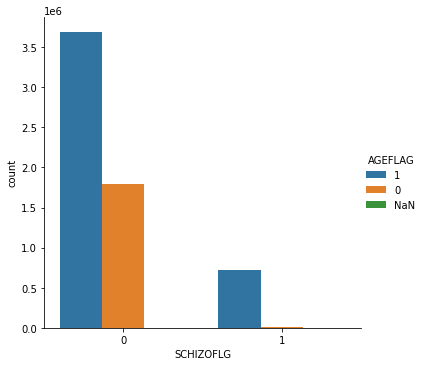

In [ ]:
g = sns.catplot(x="SCHIZOFLG", kind="count", hue = 'AGEFLAG', data=cld)

Now I'll do some data exploration to help understand which variables may be important for a linear model of level of care (inpatient/justice system/outpatient)

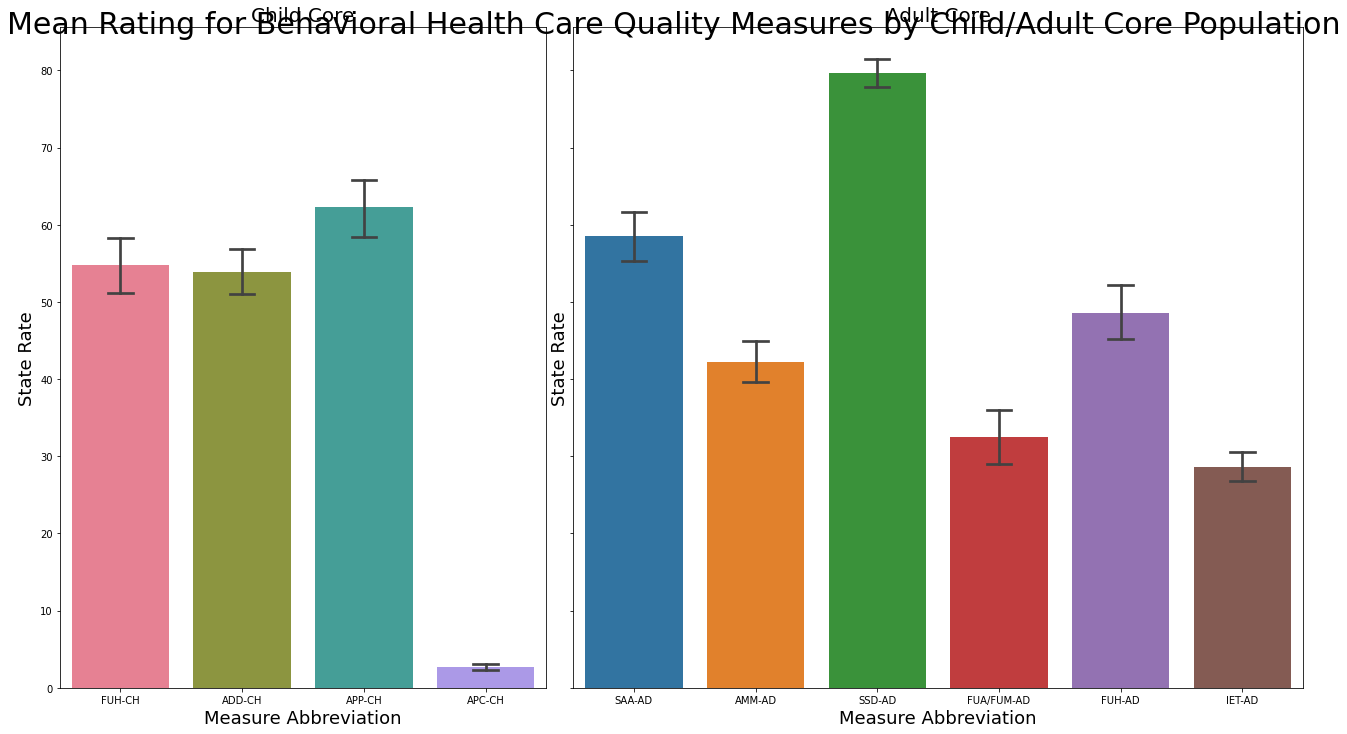

In [ ]:
#Plotting 2 bar charts side-by-side using matplotlib
#I have 4 measures for the child core population and 6 for the adult core so I've adjusted the width ratio
#Sharing the y-axis for easier comprehension
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(18,10), gridspec_kw={'width_ratios': [2, 3]})

#Figure title
fig.suptitle('Mean Rating for Behavioral Health Care Quality Measures by Child/Adult Core Population', 
             fontsize = 30)

#Changing x/y axis label sizes for both subplots (axes)
ax1.xaxis.label.set_size(18)
ax2.xaxis.label.set_size(18)
ax1.yaxis.label.set_size(18)
ax2.yaxis.label.set_size(18)

ax1.set_title("Child Core", fontsize = 20)
ax2.set_title("Adult Core", fontsize = 20)

#Removing some whitespace between the two subplots (axes)
fig.tight_layout()

#Creating the subplots

#Child core set barplot
g = sns.barplot(x="Measure Abbreviation", y = "State Rate",  
                data = qa[qa['AGEFLAG']=='0'],
                palette = "husl", capsize=.2, ax = ax1)

#Adult core set barplot
h = sns.barplot(x="Measure Abbreviation", y = "State Rate", 
                data = qa[qa['AGEFLAG']=='1'],
                capsize=.2, ax = ax2)

plt.savefig("fig.png", bbox_inches='tight')

This is interesting, but I want to be able to see what these abbreviations mean!

In [ ]:
qa['Measure Name'].unique() #These are too long to put into a table---going to shorten them a bit for visualization purposes

array(['Follow-Up After Hospitalization for Mental Illness: Ages 6-20',
       'Follow-Up Care for Children Newly Prescribed Attention-Deficit/Hyperactivity Disorder (ADHD) Medication: Ages 6-12',
       'Use of First-Line Psychosocial Care for Children and Adolescents on Antipsychotics: Ages 1-17',
       'Use of Multiple Concurrent Antipsychotics in Children and Adolescents: Ages 1-17',
       'Adherence to Antipsychotics for Individuals with Schizophrenia: Ages 19-64',
       'Antidepressant Medication Management: Age 18 and Older',
       'Diabetes Screening for People with Schizophrenia or Bipolar Disorder Who Are Using Antipsychotic Medications: Ages 18-64',
       'Follow-up After Emergency Department Visit for Mental Illness or Alcohol and Other Drug Abuse or Dependence: Age 18 and Older',
       'Follow-Up After Hospitalization for Mental Illness: Age 21 and Older',
       'Initiation and Engagement of Alcohol and Other Drug Abuse or Dependence Treatment: Age 18 and Older'],
 

In [ ]:
qa['Measure Name'] = qa['Measure Name'].str.replace(' for Mental Illness','')
qa['Measure Name'] = qa['Measure Name'].str.replace('Attention-Deficit/Hyperactivity Disorder ','')
qa['Measure Name'] = qa['Measure Name'].str.replace('(','')
qa['Measure Name'] = qa['Measure Name'].str.replace(')','')
qa['Measure Name'] = qa['Measure Name'].str.replace('Medication','Meds')
qa['Measure Name'] = qa['Measure Name'].str.replace('Antidepressant Meds','Antidepressant')
qa['Measure Name'] = qa['Measure Name'].str.replace('Antipsychotic Medss','Antipsychotics')
qa['Measure Name'] = qa['Measure Name'].str.replace('Emergency Department','ED')
qa['Measure Name'] = qa['Measure Name'].str.replace('Children and Adolescents','Children')
qa['Measure Name'] = qa['Measure Name'].str.replace('and Other','or')
qa['Measure Name'] = qa['Measure Name'].str.replace('Who Are Using','on')
qa['Measure Name'] = qa['Measure Name'].str.replace('with Schizophrenia', 'w/Schizophrenia')
qa['Measure Name'] = qa['Measure Name'].str.replace(' and Older', '+')
qa['Measure Name'].unique()

array(['Follow-Up After Hospitalization: Ages 6-20',
       'Follow-Up Care for Children Newly Prescribed ADHD Meds: Ages 6-12',
       'Use of First-Line Psychosocial Care for Children on Antipsychotics: Ages 1-17',
       'Use of Multiple Concurrent Antipsychotics in Children: Ages 1-17',
       'Adherence to Antipsychotics for Individuals w/Schizophrenia: Ages 19-64',
       'Antidepressant Management: Age 18+',
       'Diabetes Screening for People w/Schizophrenia or Bipolar Disorder on Antipsychotics: Ages 18-64',
       'Follow-up After ED Visit or Alcohol or Drug Abuse or Dependence: Age 18+',
       'Follow-Up After Hospitalization: Age 21+',
       'Initiation and Engagement of Alcohol or Drug Abuse or Dependence Treatment: Age 18+'],
      dtype=object)

In [ ]:
#Making a table to show which measure abbreviation values belong with which description
from prettytable import PrettyTable

Columns = ['Value','Description']

dx = PrettyTable()
dx.add_column(Columns[0], [*range(1, 11, 1)])
dx.add_column(Columns[1],['Follow-Up After Hospitalization: Ages 6-20',
       'Follow-Up Care for Children Newly Prescribed ADHD Meds: Ages 6-12',
       'Use of First-Line Psychosocial Care for Children on Antipsychotics: Ages 1-17',
       'Use of Multiple Concurrent Antipsychotics in Children: Ages 1-17',
       'Adherence to Antipsychotics for Individuals w/Schizophrenia: Ages 19-64',
       'Antidepressant Management: Age 18+',
       'Diabetes Screening for People w/Schizophrenia or Bipolar Disorder on Antipsychotics: Ages 18-64',
       'Follow-up After ED Visit or Alcohol or Drug Abuse or Dependence: Age 18+',
       'Follow-Up After Hospitalization: Age 21+',
       'Initiation and Engagement of Alcohol or Drug Abuse or Dependence Treatment: Age 18+'])

print(dx)

+-------+-------------------------------------------------------------------------------------------------+
| Value |                                           Description                                           |
+-------+-------------------------------------------------------------------------------------------------+
|   1   |                            Follow-Up After Hospitalization: Ages 6-20                           |
|   2   |                Follow-Up Care for Children Newly Prescribed ADHD Meds: Ages 6-12                |
|   3   |          Use of First-Line Psychosocial Care for Children on Antipsychotics: Ages 1-17          |
|   4   |                 Use of Multiple Concurrent Antipsychotics in Children: Ages 1-17                |
|   5   |             Adherence to Antipsychotics for Individuals w/Schizophrenia: Ages 19-64             |
|   6   |                                Antidepressant Management: Age 18+                               |
|   7   | Diabetes Screening

I want to plot some geographic data now.  Unfortunately my current dataset only contains state names, and not abbreviations.  The geo json file I've found uses the state abbreviation rather than the state names.  To resolve this issue, I've found a csv of state names/abbreviations and will merge the abbreviations column into my qa dataset.

In [ ]:
usa = pd.DataFrame(data= (pd.read_csv('https://raw.githubusercontent.com/samykebaish/cs5010_data_analysis_project/main/abbr-name.csv')))
#state names/abbreviations dataset

qa = pd.merge(left=usa, right=qa, how='outer', left_on = 'State', right_on = 'State')


In [ ]:
qa.dtypes #Making sure that categorical columns are not being counted as numeric--this would mess up my plots/analyses

Code                     object
State                    object
Reporting Program        object
Measure Name             object
Measure Abbreviation     object
Rate Definition          object
Population               object
State Rate              float64
AGEFLAG                  object
dtype: object

I want to know the geographic distribution of outpatient follow-up care for children/adults who've been hospitalized with a mental health condition.  I'll do this via choropleths so you can see each state's rate of follow-up care after hospitalization.

In [ ]:
qa2 = qa[qa['AGEFLAG']=='0'][['Code','State','Measure Abbreviation','Rate Definition','State Rate']]
qa2 = qa2[qa2['Rate Definition']=='Percentage of Hospitalizations for Mental Illness with a Follow-Up Visit Within 30 Days of Discharge: Ages 6-20']
qa2 = qa2.dropna(axis=0)
#dropping null values

In [ ]:
!pip install plotly==4.14.3

## Chloropleth

In [ ]:
import json
state_geo = f"https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/us-states.json"

fuhch = px.choropleth(qa2, #my dataset of interest
                    geojson=state_geo, locations='Code', #Code = state abbreviations in my data
                      color='State Rate', #my target variable from the qa2 dataset
                           scope = "usa", #sets default map zoom/focus, mine is just US states
                           title="% of Children who Had a Follow-Up Visit within 30 Days after Hospitalization for Mental Illness",
                           labels={'Color':'Follow-Up After Hospitalization for Mental Illness: Ages 6-20'},
                           color_continuous_scale= "Magma" 
                          )
fuhch.update_layout(margin={"r":0,"t":40,"l":0,"b":0}) #Margins for figure.  Had to increase t/top so you could see title
fuhch.show()

In [ ]:
qa3 = qa[qa['AGEFLAG']=='1'][['Code','State','Measure Abbreviation','Rate Definition','State Rate']]
qa3 = qa3[qa3['Rate Definition']=='Percentage of Hospitalizations for Mental Illness with a Follow-Up Visit Within 30 Days of Discharge: Ages 21-64']
qa3.head()

,Code,State,Measure Abbreviation,Rate Definition,State Rate
15,AL,Alabama,FUH-AD,Percentage of Hospitalizations for Mental Illn...,55.3
37,AZ,Arizona,FUH-AD,Percentage of Hospitalizations for Mental Illn...,61.7
58,AR,Arkansas,FUH-AD,Percentage of Hospitalizations for Mental Illn...,53.3
74,CA,California,FUH-AD,Percentage of Hospitalizations for Mental Illn...,67.0
99,CT,Connecticut,FUH-AD,Percentage of Hospitalizations for Mental Illn...,70.4


In [ ]:
fuhad = px.choropleth(qa3, 
                    geojson=state_geo, locations='Code', color='State Rate',
                           scope = "usa",
                           title="% of Adults who Had a Follow-Up Visit within 30 Days after Hospitalization for Mental Illnes",
                           labels={'Color':'Follow-Up After Hospitalization for Mental Illness: Ages 21-64'},
                           color_continuous_scale="Magma"
                          )
fuhad.update_layout(margin={"r":0,"t":40,"l":0,"b":0})
fuhad.show()


Next, I'll look at state rates of follow-up care for adults who've had ER visits. This is different than those who've been hospitalized because people presenting to the ER may be screened out of inpatient services.  Unfortunately, this variable is not measured for children, so there will be only one choropleth.

In [ ]:
qa2 = qa[qa['AGEFLAG']=='1'][['Code','State','Measure Abbreviation','Rate Definition','State Rate']]
qa2 = qa[qa['Rate Definition']=='Percentage of Emergency Department (ED) Visits for Mental Illness with a Follow-Up Visit Within 30 Days of the ED Visit: Ages 18-64']
qa2 = qa2.dropna(axis=0)

In [ ]:
fuhch = px.choropleth(qa2, #my dataset of interest
                    geojson=state_geo, locations='Code', #Code = state abbreviations in my data
                      color='State Rate', #my target variable from the qa2 dataset
                           scope = "usa", #sets default map zoom/focus, mine is just US states
                           title="% of Adults who Had a Follow-Up Visit within 30 Days after ER Visit for Mental Illness",
                           labels={'Color':'Follow-Up After ER Visit for Mental Illness: Ages 18-64'},
                           color_continuous_scale= "Magma" 
                          )
fuhch.update_layout(margin={"r":0,"t":40,"l":0,"b":0}) #Margins for figure.  Had to increase t/top so you could see title
fuhch.show()

While some states are doing pretty well (especially for follow-ups after hospitalization for children), it looks like many adults who go to an ER or are hospitalized for a mental health concern are falling through the cracks when it comes to outpatient and wraparound treatment services.

Since the # of states reporting the children's post-hospitalization followup rate is so low, I'm going to to focus on the adult population stats.  Looking at some of the client-level data to see which variables maybe important drivers of level of care

In [ ]:
cldstatebed = cld[cld['SPHSERVICE']==1]
#Looking at folks in state hospital beds (cldstatebed)

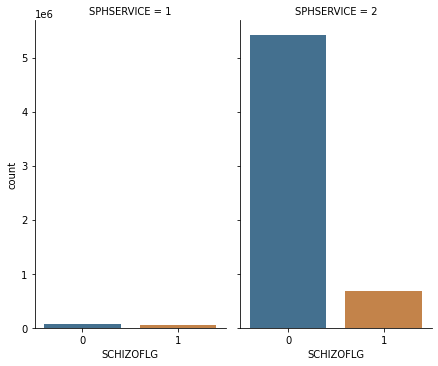

In [ ]:
g = sns.catplot(x="SCHIZOFLG", col="SPHSERVICE",
                data=cld, saturation=.5,
                kind="count", aspect=.6)

As you can see, the amount of people being served by inpatient programs run by state funding is much smaller than those who are not.  This is important to know because this could potentially bias any modeling we do if we don't account for the skewness of our sample!

In [ ]:
newcld = cld[cld['AGEFLAG']=='1'] #Filtering for adult core only, as the child core dataset has many more missing values.

In [ ]:
newcld = newcld.set_index('CASEID') #Setting the case ID as the index

Since the year is the same for all rows, I'm dropping that column. I'm also dropping region, as I am grouping by state. I do not find region to be a useful variable since it's artificially defined by census divisions, but has no functional meaning--while each state's health department must collect its own data, there is no regional association that oversees or provides direction for the states. I am also dropping age as I have created my own age flag to separate child and adult core sets.

In [ ]:
newcld = newcld.drop(columns = ['YEAR','AGE','REGION','DIVISION'])

In [ ]:
newcld = newcld.replace('-9', np.nan)
#-9 is a code for missing data!

'IJSSERVICE is an indicator for whether or not patients are receiving care from a treatment center within \nthe justice system or department of corrections.\n1 = Receiving care from justice system treatment center\n2 = Not receiving care from justice system treatment center'

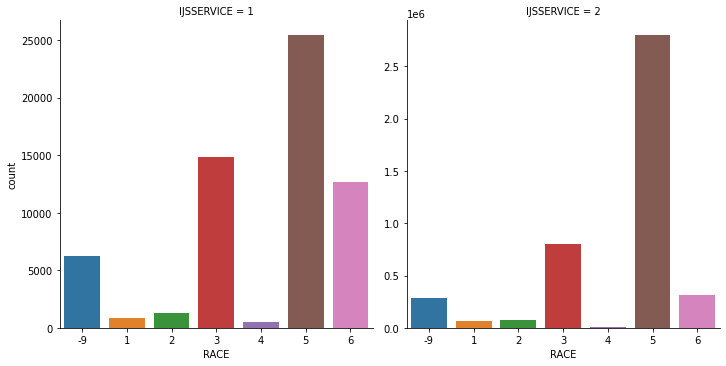

In [ ]:
sns.catplot(x= 'RACE', data = newcld, col = 'IJSSERVICE', kind = 'count', sharey=False)

'''IJSSERVICE is an indicator for whether or not patients are receiving care from a treatment center within 
the justice system or department of corrections.
1 = Receiving care from justice system treatment center
2 = Not receiving care from justice system treatment center'''

While the number of white patients (code = 5) seems fairly constant between the levels of IJSSERVICE, the number of black (code = 3) and multiracial/other race (code = 6) patients may be disproportionately high in inpatient treatment settings, or disproportionately low in outpatient treatment settings. Since the number of patients in inpatient and criminal justice system treatment centers is so much lower than those in outpatient or community settings, I'm going to create a couple of variables to try to equalize the proportions a big.  I'll make an "inpt" (inpatient) variable, which combines the state-funded and non-stante funded inpatient treatment centers flag columns.  This means that if someone is receiving care within either of those settings, inpt = 1.  

Similarly, I'll create a variables called "InptJust" -- which combines the criteria for "Inpt" along with the flag for incarceration/criminal justice system treatment centers (IJSSERVICE).  A "yes" to any inpatient/justice system treatment column will make InptJust = 1.

In [ ]:
newcld['InptJust'] = np.where((newcld['IJSSERVICE']==1) | (newcld['SPHSERVICE']==1) | (newcld['OPISERVICE']==1), 1, 2)

newcld['Inpt'] = np.where((newcld['SPHSERVICE']==1) | (newcld['OPISERVICE']==1), 1, 2)

'IJSSERVICE is an indicator for whether or not patients are receiving care from a treatment center within \nthe justice system or department of corrections.\n1 = Receiving care from justice system treatment center\n2 = Not receiving care from justice system treatment center\n\nInptJust combines the Inpt (Inpatient) and IJSSERVICE variables.\n1 = Receiving care from justice system treatment center, state-funded inpatient behavioral health center, or \nnon-state funded inpatient behavioral health\n2 = Not receiving care from justice system treatment center or inpatient behavioral health center'

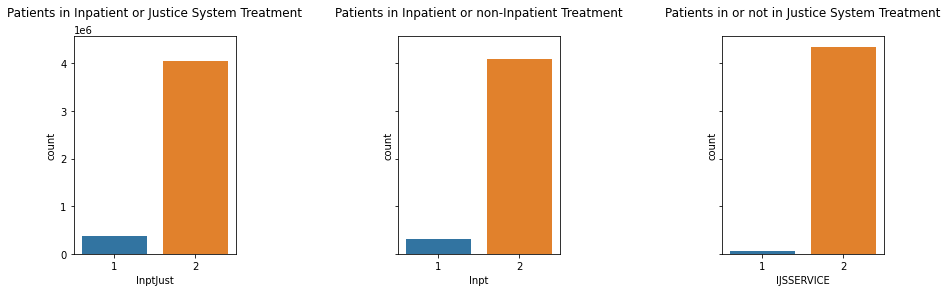

In [ ]:
fig, axes = plt.subplots(1,3, sharey=True)

sns.countplot(ax= axes[0], x="InptJust",data=newcld)
axes[0].set_title("Patients in Inpatient or Justice System Treatment", pad = 20)
sns.countplot(ax= axes[1], x="Inpt",data=newcld)
axes[1].set_title("Patients in Inpatient or non-Inpatient Treatment", pad = 20)
sns.countplot(ax = axes[2], x="IJSSERVICE",data=newcld)
axes[2].set_title("Patients in or not in Justice System Treatment", pad = 20)
fig.subplots_adjust(left=None, bottom=None, right=2, top=None, wspace=1, hspace=None)

'''IJSSERVICE is an indicator for whether or not patients are receiving care from a treatment center within 
the justice system or department of corrections.
1 = Receiving care from justice system treatment center
2 = Not receiving care from justice system treatment center

InptJust combines the Inpt (Inpatient) and IJSSERVICE variables.
1 = Receiving care from justice system treatment center, state-funded inpatient behavioral health center, or 
non-state funded inpatient behavioral health
2 = Not receiving care from justice system treatment center or inpatient behavioral health center'''

"IJSSERVICE is an indicator for whether or not patients are receiving care from a treatment center within \nthe justice system or department of corrections.\n1 = Receiving care from justice system treatment center\n2 = Not receiving care from justice system treatment center\n\nSCHIZOFLG is an indicator flag for whether or not patients have been diagnosed with schizophrenia or other \npsychotic disorders (regardless of whether it's their primary, secondary, or tertiary diagnosis).\n0 = Patient has not been diagnosed with schizophrenia or other psychotic illness(es)\n1 = Patient has been diagnosed with schizophrenia or other psychotic illness(es)\n"

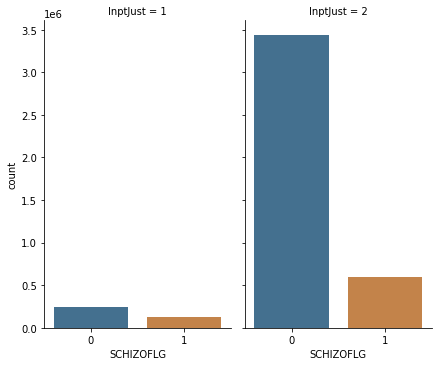

In [ ]:
g = sns.catplot(x="SCHIZOFLG", col="InptJust",
                data=newcld, saturation=.5,
                kind="count", aspect=.6)

'''IJSSERVICE is an indicator for whether or not patients are receiving care from a treatment center within 
the justice system or department of corrections.
1 = Receiving care from justice system treatment center
2 = Not receiving care from justice system treatment center

SCHIZOFLG is an indicator flag for whether or not patients have been diagnosed with schizophrenia or other 
psychotic disorders (regardless of whether it's their primary, secondary, or tertiary diagnosis).
0 = Patient has not been diagnosed with schizophrenia or other psychotic illness(es)
1 = Patient has been diagnosed with schizophrenia or other psychotic illness(es)
'''

This is still hard to read due to how small the InptJust group is compared to those not in that group (InptJust = 2).  I'm going to change my scale to be standardized percentages, which will be more informative

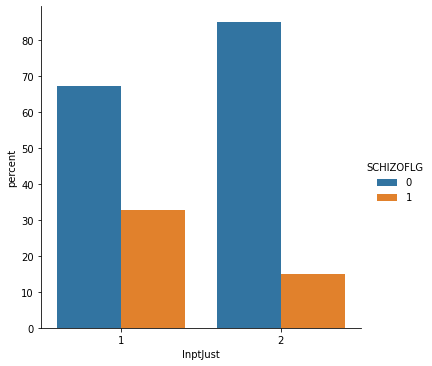

In [ ]:
x,y = 'InptJust', 'SCHIZOFLG'

(newcld.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar'))

So it does appear that some of the flags for specific disorder types (such as depressive, or in this case, schizophrenia and psychotic disorders) may be important in predicting level of care--schizophrenia/psychotic disorders are overrepresented in the inpatient/criminal justice sytem poulations as compared with outpatient/community settings!

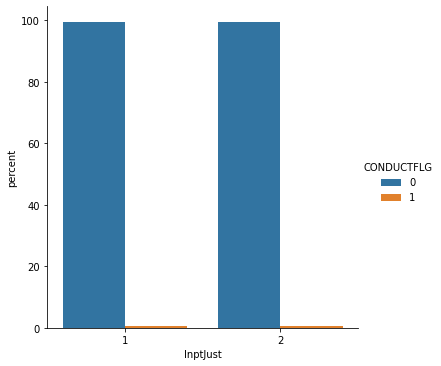

In [ ]:
x,y = 'InptJust', 'CONDUCTFLG'

(newcld.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar'))

It's difficult to tell since the samples are so unbalanced, but it appears that being diagnoesd with a conduct disorder (CONDUCTFLG = 1) is not more likely in the InptJust = 1 group

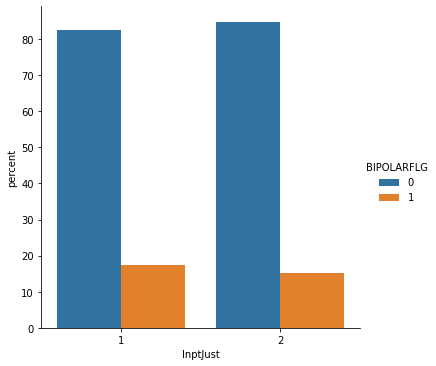

In [ ]:
x,y = 'InptJust', 'BIPOLARFLG'

(newcld.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar'))

There seem to be more patients iwth bipolar diagnoses ####

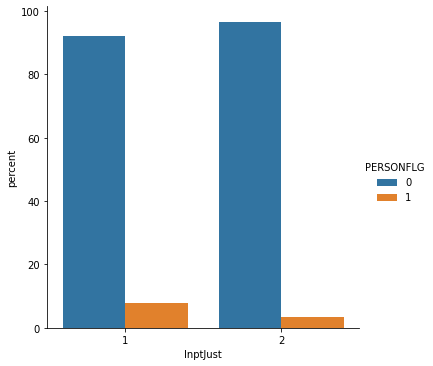

In [ ]:
x,y = 'InptJust', 'PERSONFLG'

(newcld.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar'))

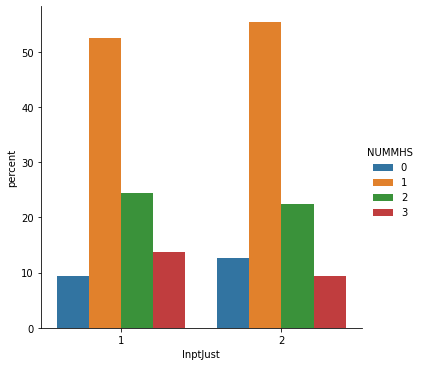

In [ ]:
x,y = 'InptJust', 'NUMMHS'

(newcld.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar'))

There does not appear to be significant differences between the number of mental health diagnoses (NUMMHS) between the InptJust levels. I wouldn't expect this to contribute much to the variance

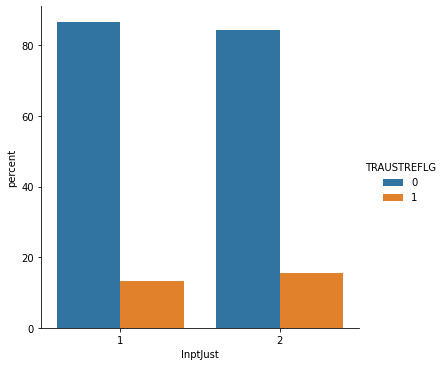

In [ ]:
x,y = 'InptJust', 'TRAUSTREFLG'

(newcld.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar'))

So it looks like the percentage of individuals diagnosed with a trauma-related disorder is not significantly different across the levels of InptJust

It seems like certain variables like race and SCHIZOFLG may be helpful!  Before I fit the linear model, I'm curious to know what a principal component analysis would show.  This could potentially help me narrow down the list of variables to include in the model by reducing the dimensionality--since the variable columns are reduced into a predetermined number of "principal components", I can choose this to be a lower number than the number of variables I currently have.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
fips = (pd.read_csv('https://raw.githubusercontent.com/samykebaish/cs5010_data_analysis_project/main/state-fips.csv'))
fips[' st'] = fips[' st'].astype('category')
newcld['STATEFIP'] = newcld['STATEFIP'].astype('category') 

In [ ]:
cld2 = pd.merge(left = newcld, right = fips, how = 'outer',
               left_on = 'STATEFIP', right_on = ' st')

In [ ]:
cld2[' stusps'] = cld2[' stusps'].str.strip()
cld2 = cld2[cld2['AGEFLAG']=='1']

In [ ]:
#Merging with quality measures data
qacld = pd.merge(left=cld2[['AGEFLAG',' stusps','ETHNIC','RACE','GENDER', 'MH1',
                            'SPHSERVICE','CMPSERVICE','OPISERVICE','RTCSERVICE','IJSSERVICE',
                           'SMISED','LIVARAG','NUMMHS','TRAUSTREFLG','ANXIETYFLG',
                           'ADHDFLG','CONDUCTFLG','BIPOLARFLG','DEPRESSFLG','ODDFLG','PDDFLG',
                           'PERSONFLG','SCHIZOFLG','ALCSUBFLG','OTHERDISFLG','Inpt','InptJust']], right=qa3[['Code','State Rate']], how='inner', 
              left_on = ' stusps', right_on = 'Code')

## PCA

Based on: https://www.reneshbedre.com/blog/principal-component-analysis.html

In [ ]:
qacld2 = qacld.drop(columns = ['OPISERVICE','SPHSERVICE','Code',' stusps','IJSSERVICE','Inpt','MH1','AGEFLAG'])

#Ensuring all my valuables are categorical

qacld2.loc[:,['InptJust']] = qacld2.loc[:,['InptJust']].astype('category')

#dropping nan values (as the PCA and logistic regression will not allow them)
qacld2 = qacld2.replace(-9,np.nan)
qacld2 = qacld2.dropna()

In [ ]:
X = qacld2.loc[:, qacld2.columns != 'InptJust']
y = qacld2.loc[:, qacld2.columns == 'InptJust']

num_cols_names = ['State Rate'] #numeric columns! important for oversampling later

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(qacld2,y, test_size = 0.90,stratify=y, 
                                                    random_state=123)

In [ ]:
'''Scaling the data first fitting it and transforming the training set
to later apply the fit to transform the test set.'''
#Instantiate Satandard Scaler
scaler = StandardScaler()
#Fit transform the numerical features in the training dataset to a new dataframe
scaled_numfeats_train = pd.DataFrame(scaler.fit_transform(X_train.loc[:,num_cols_names]), 
                                     columns=num_cols_names, index= X_train.index)
#Integrate scaled values to the training set
for col in num_cols_names:
    X_train.loc[:,col] = scaled_numfeats_train.loc[:,col]
#Transform the numerical features inthe training dataset to a new dataframe
scaled_numfeats_test = pd.DataFrame(scaler.transform(X_test.loc[:,num_cols_names]),
                                    columns=num_cols_names, index= X_test.index)
#Integrate scaled values to the test set
for col in num_cols_names:
    X_test.loc[:,col] = scaled_numfeats_test.loc[:,col]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1781: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1781: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
principalComponents = pca.fit_transform(X)

In [ ]:
pca.explained_variance_ratio_

array([0.97250408, 0.0078599 , 0.00482981, 0.00392952, 0.00199926,
       0.00162026, 0.00121795, 0.00107391, 0.00105504, 0.000973  ])

In [ ]:
np.cumsum(pca.explained_variance_ratio_)

array([0.97250408, 0.98036397, 0.98519378, 0.9891233 , 0.99112257,
       0.99274282, 0.99396078, 0.99503468, 0.99608973, 0.99706273])

In [ ]:
# component loadings or weights (correlation coefficient between original variables and the component) 
# component loadings represents the elements of the eigenvector
# the squared loadings within the PCs always sums to 1
loadings = pca.components_
num_pc = pca.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = X.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
variable,,,,,,,,,,
ETHNIC,-0.001078,0.093707,0.036625,0.063854,-0.003109,0.048712,-0.065761,-0.254543,-0.121750,-0.934231
RACE,0.006269,-0.988177,-0.096733,-0.036462,0.024828,-0.008640,0.018684,0.001185,0.005872,-0.107175
GENDER,-0.000409,-0.018055,0.080793,0.013774,-0.622345,0.651280,0.354755,0.185587,0.009934,-0.057493
CMPSERVICE,0.000184,0.001974,-0.008832,-0.008530,0.025771,-0.012786,0.018396,-0.014717,0.015497,0.016751
RTCSERVICE,-0.000105,-0.000762,-0.000868,0.005301,-0.011621,0.001948,-0.006828,-0.004280,-0.003339,0.004252
SMISED,0.004452,-0.018324,-0.177301,0.967650,0.023120,-0.013523,0.022945,0.046419,0.030258,0.016342
LIVARAG,0.000790,0.001746,-0.019736,0.011184,0.147106,-0.003500,0.680965,-0.694086,0.010257,0.149971
NUMMHS,0.009809,-0.086955,0.901936,0.141141,0.203385,0.011670,0.037113,0.039877,0.093585,-0.014184
TRAUSTREFLG,0.001833,-0.010030,0.134060,0.060668,0.005030,0.130227,-0.043025,0.044315,0.612754,0.038511


What happens if I make the # of components smaller? And reduce dimensionality by only including MH1?

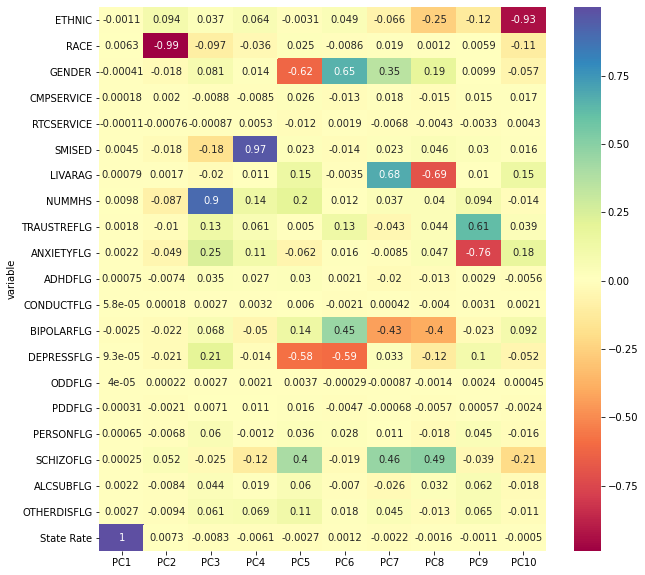

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(loadings_df, annot=True, cmap='Spectral')
plt.savefig("heatmap.png", transparent = True)

In [ ]:
#Including fewer variables
qacld3 = qacld[['InptJust','State Rate','MH1','RACE','ETHNIC','GENDER','LIVARAG','SMISED','NUMMHS']]

#dropping null values (-9)
qacld3 = qacld3.replace(-9, np.nan)
qacld3 = qacld3.dropna()

#Ensuring all my valuables are categorical
qacld3[['InptJust']] = qacld3[['InptJust']].astype('category') 

#setting up my x and y datasets
X = qacld3.loc[:, qacld3.columns != 'InptJust']
y = qacld3.loc[:, qacld3.columns == 'InptJust']

#specifying my numeric x columns
num_cols_names = ['State Rate'] 

#Creating training/test datasets, testing dataset is 30%, training is 70%
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30,stratify=y, 
                                                    random_state=876)

#Scaling numeric x data

#Instantiate Satandard Scaler
scaler = StandardScaler()
#Fit transform the numerical features in the training dataset to a new dataframe
scaled_numfeats_train = pd.DataFrame(scaler.fit_transform(X_train.loc[:,num_cols_names]), 
                                     columns=num_cols_names, index= X_train.index)
#Integrate scaled values to the training set
for col in num_cols_names:
    X_train.loc[:,col] = scaled_numfeats_train.loc[:,col]
#Transform the numerical features inthe training dataset to a new dataframe
scaled_numfeats_test = pd.DataFrame(scaler.transform(X_test.loc[:,num_cols_names]),
                                    columns=num_cols_names, index= X_test.index)
#Integrate scaled values to the test set
for col in num_cols_names:
    X_test.loc[:,col] = scaled_numfeats_test.loc[:,col]


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1781: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1781: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(X)

In [ ]:
# component loadings or weights (correlation coefficient between original variables and the component) 
# component loadings represents the elements of the eigenvector
# the squared loadings within the PCs always sums to 1
loadings = pca.components_
num_pc = pca.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = X.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df

,PC1,PC2,PC3,PC4,PC5
variable,,,,,
State Rate,0.999941,-0.003078,0.006450,-0.003413,-0.007326
MH1,-0.002809,-0.999238,-0.017610,0.022510,0.014112
RACE,0.005917,0.016665,-0.993450,-0.012274,-0.054151
ETHNIC,-0.001177,0.003072,0.095123,0.052022,0.044861
GENDER,-0.000437,0.020988,-0.006578,-0.025046,0.057614
LIVARAG,0.000652,-0.007406,-0.001157,0.029680,-0.006005
SMISED,0.004122,0.024224,-0.020860,0.995146,0.067445
NUMMHS,0.007539,0.012035,-0.056360,-0.069293,0.993427


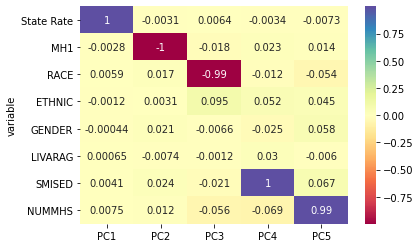

In [ ]:
ax = sns.heatmap(loadings_df, annot=True, cmap='Spectral')
plt.show()

In [ ]:
np.cumsum(pca.explained_variance_ratio_)

array([0.90013456, 0.98224858, 0.98966961, 0.99313254, 0.99641852])

## Logistic Regression

Based on: https://realpython.com/logistic-regression-python/#logistic-regression-in-python-with-scikit-learn-example-1

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

X = qacld2.loc[:, qacld2.columns != 'InptJust']
y = qacld2.loc[:, qacld2.columns == 'InptJust']

num_cols_names = ['State Rate'] 

#Scaling numeric x data

#Instantiate Satandard Scaler
scaler = StandardScaler()
#Fit transform the numerical features in the training dataset to a new dataframe
scaled_numfeats_train = pd.DataFrame(scaler.fit_transform(X_train.loc[:,num_cols_names]), 
                                     columns=num_cols_names, index= X_train.index)
#Integrate scaled values to the training set
for col in num_cols_names:
    X_train.loc[:,col] = scaled_numfeats_train.loc[:,col]
#Transform the numerical features inthe training dataset to a new dataframe
scaled_numfeats_test = pd.DataFrame(scaler.transform(X_test.loc[:,num_cols_names]),
                                    columns=num_cols_names, index= X_test.index)
#Integrate scaled values to the test set
for col in num_cols_names:
    X_test.loc[:,col] = scaled_numfeats_test.loc[:,col]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3,stratify=y, 
                                                    random_state=876)


In [ ]:
model = LogisticRegression(solver='liblinear', random_state=100).fit(X_train, np.ravel(y_train))
print(model.score(X_train, y_train))
print(model.score(X_test,y_test))

0.9292869211738591
0.929414450774566


In [ ]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.88      0.26      0.40     50793
         2.0       0.93      1.00      0.96    505454

    accuracy                           0.93    556247
   macro avg       0.91      0.63      0.68    556247
weighted avg       0.93      0.93      0.91    556247



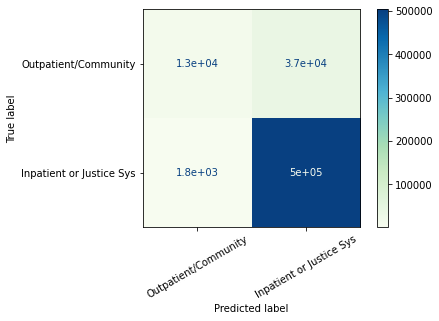

In [ ]:
from sklearn.metrics import plot_confusion_matrix
conf = plot_confusion_matrix(model, X_test, y_test,
                                 cmap=plt.cm.GnBu,
                            display_labels = ['Outpatient/Community','Inpatient or Justice Sys'],
                            xticks_rotation = 30)

In [ ]:
coef_table = pd.DataFrame(list(X_train.columns)).copy()
coef_table.insert(len(coef_table.columns),"Coefs",model.coef_.transpose())
coef_table.columns = ['Variable','Coefficient']
coef_table

,Variable,Coefficient
0,ETHNIC,0.118819
1,RACE,0.047170
2,GENDER,0.560253
3,CMPSERVICE,-4.751256
4,RTCSERVICE,-0.960686
5,SMISED,0.174319
6,LIVARAG,-0.762099
7,NUMMHS,-0.319793
8,TRAUSTREFLG,0.061937
9,ANXIETYFLG,0.550852


Unfortunatley, this model can't accurately predict level of treatment using the variables I have. This may be because the variables are multicollinear, or because the samples are of very unequal sizes.  It looks like we may need to investigate another method of prediction.

#Trends of Gender MH1 disease incidence 2013-2018

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).
        MH1      MH2      MH3  YEAR  GENDER
0  12713079  7454984  2105582  2013       1
1  12698160  7199947  2025647  2013       2
2  13172056  7165549  2545963  2014       1
3  13053222  6916644  2502171  2014       2
4  11568522  6764441  2513512  2015       1
5  11578341  6586879  2524322  2015       2
6  12432866  5264429  1874205  2016       1
7  12419931  4993687  1814705  2016       2
8  14155873  4271147  1328223  2017       1
9  14271128  4173820  1435710  2017       2


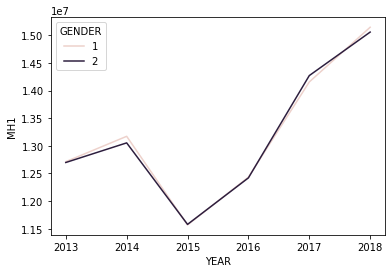

In [ ]:
import pandas as pd
import plotly
import plotly.express as px
from urllib.request import urlopen
import json
import plotly.graph_objects as go
import numpy as np
from datetime import datetime as dt
from google.colab import drive
import seaborn as sns

# Mount your Drive to the Colab VM.
from google.colab import  drive
drive.mount('/drive')

df_2013 = pd.read_csv("https://csprojectdatavisualization.s3.us-east-2.amazonaws.com/MHCLD_PUF_2013.csv")
df_2014 = pd.read_csv("https://csprojectdatavisualization.s3.us-east-2.amazonaws.com/MHCLD_PUF_2014.csv")
df_2015 = pd.read_csv("https://csprojectdatavisualization.s3.us-east-2.amazonaws.com/MHCLD_PUF_2015.csv")
df_2016 = pd.read_csv("https://csprojectdatavisualization.s3.us-east-2.amazonaws.com/MHCLD_PUF_2016.csv")
df_2017 = pd.read_csv("https://csprojectdatavisualization.s3.us-east-2.amazonaws.com/MHCLD_PUF_2017.csv")
df_2018 = pd.read_csv("https://csprojectdatavisualization.s3.us-east-2.amazonaws.com/MHCLD_PUF_2018.csv")



dataframes = [df_2013, df_2014, df_2015, df_2016, df_2017, df_2018]
years = ['2013', '2014', '2015', '2016', '2017', '2018']

i = 0 
for dataframe in dataframes:
  dataframe['MH1'] = dataframe['MH1'].apply(lambda x: 0 if x == -9 else x)
  dataframe['MH2'] = dataframe['MH2'].apply(lambda x: 0 if x == -9 else x)
  dataframe['MH3'] = dataframe['MH3'].apply(lambda x: 0 if x == -9 else x)
  dataframe.drop(dataframe.loc[dataframe['GENDER']==-9].index, inplace=True)
  dataframe.drop(dataframe.loc[dataframe['ETHNIC']==-9].index, inplace=True)

#This data creates individual csvs for the frequencies of MH1, MH2, and MH3 diagnoses
#which was later inputted into our 

  df_codes_MH1 = list(dataframe['MH1'].value_counts().index)
  df_frequencies_MH1 = list(dataframe['MH1'].value_counts().values)
  df_codes_and_frequencies_MH1 = pd.DataFrame({'MH1 Code': df_codes_MH1, 'MH1 Count': df_frequencies_MH1})
  name_mh1 = 'df_' + years[i] + '_MH1_codes_and_frequencies.csv'
  path_mh1 = '/drive/My Drive/mh1_mh2_mh3/' + name_mh1
 # df_codes_and_frequencies_MH1.to_csv(path_mh1)

  df_codes_MH2 = list(dataframe['MH2'].value_counts().index)
  df_frequencies_MH2 = list(dataframe['MH2'].value_counts().values)
  df_codes_and_frequencies_MH2 = pd.DataFrame({'MH2 Code': df_codes_MH2, 'MH2 Count': df_frequencies_MH2})
  name_mh2 = 'df_' + years[i] + '_MH2_codes_and_frequencies.csv'
  #path_mh2 = '/drive/My Drive/mh1_mh2_mh3/' + name_mh2

  df_codes_and_frequencies_MH2.to_csv(path_mh2)


  df_codes_MH3 = list(dataframe['MH3'].value_counts().index)
  df_frequencies_MH3 = list(dataframe['MH3'].value_counts().values)
  df_codes_and_frequencies_MH3 = pd.DataFrame({'MH3 Code': df_codes_MH3, 'MH3 Count': df_frequencies_MH3})
  name_mh3 = 'df_' + years[i] + '_MH3_codes_and_frequencies.csv'
  path_mh3 = '/drive/My Drive/mh1_mh2_mh3/' + name_mh3
  #df_codes_and_frequencies_MH3.to_csv(path_mh3)



  i+=1


df_2013_gender = df_2013.groupby(['GENDER']).agg({'MH1':['sum'], 'MH2':['sum'], 'MH3':['sum'],'YEAR':['max']})
df_2014_gender = df_2014.groupby(['GENDER']).agg({'MH1':['sum'], 'MH2':['sum'], 'MH3':['sum'], 'YEAR':['max']})
df_2015_gender = df_2015.groupby(['GENDER']).agg({'MH1':['sum'], 'MH2':['sum'], 'MH3':['sum'],'YEAR':['max']})
df_2016_gender = df_2016.groupby(['GENDER']).agg({'MH1':['sum'], 'MH2':['sum'], 'MH3':['sum'],'YEAR':['max']})
df_2017_gender = df_2017.groupby(['GENDER']).agg({'MH1':['sum'], 'MH2':['sum'], 'MH3':['sum'], 'YEAR':['max']})
df_2018_gender = df_2018.groupby(['GENDER']).agg({'MH1':['sum'], 'MH2':['sum'], 'MH3':['sum'],'YEAR':['max']})



df_2013_gender['YEAR'] = 2013
df_2014_gender['YEAR'] = 2014
df_2015_gender['YEAR'] = 2015
df_2016_gender['YEAR'] = 2016
df_2017_gender['YEAR'] = 2017
df_2018_gender['YEAR'] = 2018

df_2013_gender['GENDER'] = df_2013_gender.index
df_2014_gender['GENDER'] = df_2014_gender.index
df_2015_gender['GENDER'] = df_2015_gender.index
df_2016_gender['GENDER'] = df_2016_gender.index
df_2017_gender['GENDER'] = df_2017_gender.index
df_2018_gender['GENDER'] = df_2018_gender.index



df_2013_gender.columns = df_2013_gender.columns.get_level_values(0)
df_2014_gender.columns = df_2014_gender.columns.get_level_values(0)
df_2015_gender.columns = df_2015_gender.columns.get_level_values(0)
df_2016_gender.columns = df_2016_gender.columns.get_level_values(0)
df_2017_gender.columns = df_2017_gender.columns.get_level_values(0)
df_2018_gender.columns = df_2018_gender.columns.get_level_values(0)




pieces = (df_2013_gender, df_2014_gender, df_2015_gender, df_2016_gender, df_2017_gender, df_2018_gender)

final_df = pd.DataFrame(np.concatenate([df_2013_gender.values, df_2014_gender.values, df_2015_gender.values, df_2016_gender.values, df_2017_gender.values, df_2018_gender.values]), columns = df_2018_gender.columns)
print(final_df.head(10))



sns.lineplot(data=final_df, x="YEAR", y="MH1", hue="GENDER")
# sns.histplot(data=df_2018, x="MH1", hue="ETHNIC")



# sns.barplot(data=df_2020_gender, x="YEAR", y="MH1", hue=df_2020_gender.index)


# sentiment_jan_2021_ntlk.to_csv('/drive/My Drive/sentiment_jan_2021_ntlk.csv')
# sentiment_jan_2021_textblob.to_csv('/drive/My Drive/sentiment_jan_2021_textblob.csv')

#Naive Bayes Classifer: Multifeature, Single Label Output

---



In [ ]:
import pandas as pd
from google.colab import  drive
import numpy as np
from sklearn.preprocessing import LabelEncoder
import random
from sklearn.naive_bayes import GaussianNB
import unittest
import scipy

from sklearn.model_selection import train_test_split

df = pd.read_csv("https://csprojectdatavisualizationsample50k.s3.us-east-2.amazonaws.com/sample_df.csv")
df_columns = df.columns
df_feature_names = (df_columns[2:7]).to_list()
df_features = df.iloc[:,2:7].values
df_label_names = (df_columns[26:27]).to_list()
df_label = df.iloc[:, 26:27].values
print("Features tested: ", df_feature_names)
print("Labels tested: ", df_label_names)


train, test, train_labels, test_labels = train_test_split(df_features,
                                                          df_label,
                                                          test_size=0.5,
                                                          random_state=42)
print(train.shape)


if __name__ == '__main__':
    unittest.main(argv=[''], exit=False)          

# Initialize our classifier
gnb = GaussianNB()

# Train our classifier
model = gnb.fit(train, train_labels.ravel())

test_to_predict = [[4,3,2,2,2]]
# Make predictions
preds = gnb.predict(test_to_predict)
print(preds) #no ADHD in this case

accuracy = model.score(train, train_labels)
print("The accuracy is", accuracy)


class TestTrainAndLabels(unittest.TestCase):

  def test_TrainShapeEqualToLabels(self):
      #the shape of the train dataset must be congruent with the number of rows of the 
      #labels
  
    train_1, test_1, train_labels_1, test_labels_1 = train_test_split(df_features,
                                                          df_label,
                                                          test_size=0.5,
                                                          random_state=42)  
    
    train_1_shape = train_1.shape
    train_labels_1_shape = train__labels_1_shape = train_labels_1.shape

    self.assertEqual(train_1_shape[0], train_labels_1_shape[0]) #OK

  def test_OneLabelOutput(self):

      #Scikit NB only takes one column output 
    train_2, test_2, train_labels_2, test_labels_2 = train_test_split(df_features,
                                                          df_label,
                                                          test_size=0.5,
                                                          random_state=42)  

    train_2_shape = train_2.shape
    train_labels_2_shape = train_labels_2.shape

    self.assertEqual(train_labels_2_shape[1], 1) #OK

  def test_accuracyGreaterThanEightyPercent(self):

    #Ascertaining Accurary greater than 80%
    #to determine how reliable it is. 

    self.assertGreater(accuracy, 0.8)

  
  def test_PredictionSize(self):

    #Prediction input needs to fit the same shape
    #as the features

    preds_size = len(test_to_predict[0])
    features_size = len(df_feature_names)


    self.assertEqual(preds_size, features_size) #OK

if __name__ == '__main__':
    unittest.main(argv=[''], exit=False)       

....
----------------------------------------------------------------------
Ran 4 tests in 0.014s

OK
....

Features tested:  ['AGE', 'EDUC', 'ETHNIC', 'RACE', 'GENDER']
Labels tested:  ['ADHDFLG']
(25000, 5)
[0]
The accuracy is 0.89104



----------------------------------------------------------------------
Ran 4 tests in 0.015s

OK


#KNN: Multifeature, Multi Label Output

In [ ]:
import pandas as pd
from google.colab import  drive
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import scipy
from sklearn.model_selection import train_test_split




df = pd.read_csv("https://csprojectdatavisualizationsample50k.s3.us-east-2.amazonaws.com/sample_df.csv")
df_columns = df.columns
df_feature_names = (df_columns[2:15]).to_list()
print("Features to be analyzed ", df_feature_names)
df_features = df.iloc[:,2:15].values
df_label_names = (df_columns[26:36]).to_list()
df_labels = df.iloc[:, 26:36].values
print("Labels to be analyzed", df_label_names)

#Input


# Split our data
train, test, train_labels, test_labels = train_test_split(df_features,
                                                          df_labels,
                                                          test_size=0.25,
                                                          random_state=42)

row = [[3, 2, 3, 5, 2, 1, 1, 1, 2, 1, 1,1,6]]

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 7).fit(train, train_labels)
result = knn.predict(row)
print("Prediction is ", result)
# accuracy on X_test
accuracy = knn.score(train, train_labels)
print("The accuracy is", accuracy)



Features to be analyzed  ['AGE', 'EDUC', 'ETHNIC', 'RACE', 'GENDER', 'SPHSERVICE', 'CMPSERVICE', 'OPISERVICE', 'RTCSERVICE', 'IJSSERVICE', 'MH1', 'MH2', 'MH3']
Labels to be analyzed ['ADHDFLG', 'CONDUCTFLG', 'DELIRDEMFLG', 'BIPOLARFLG', 'DEPRESSFLG', 'ODDFLG', 'PDDFLG', 'PERSONFLG', 'SCHIZOFLG', 'ALCSUBFLG']
Prediction is  [[0 0 0 0 1 0 0 0 0 0]]
The accuracy is 0.9034666666666666


#Multilabel Classification Using Adam

The Adam optimization algorithm is used, as opposed to stochastic gradient descent, which stands for Adaptive Moment Estimation. Unlike stochastic gradients, which use single learning rates, here the Adam algorithm implements both Adaptive Gradient Algorithm and Root Mean Square Propagation. These two mechanisms calculacate an exponential moving average of the gradient and the squared gradient. 

In [ ]:

# mlp for multi-label classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_multilabel_classification
from sklearn.model_selection import RepeatedKFold
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score
import pandas as pd 

# get the model
def get_model(n_inputs, n_outputs):
	model = Sequential()
	model.add(Dense(20, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
	model.add(Dense(n_outputs, activation='sigmoid'))
	model.compile(loss='binary_crossentropy', optimizer='adam')
	return model

# evaluate a model using repeated k-fold cross-validation
def evaluate_model(X, y):
	results = list()
	n_inputs, n_outputs = X.shape[1], y.shape[1]
	# define evaluation procedure
	cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
	# enumerate folds
	for train_ix, test_ix in cv.split(X):
		# prepare data
		X_train, X_test = X[train_ix], X[test_ix]
		y_train, y_test = y[train_ix], y[test_ix]
		# define model
		model = get_model(n_inputs, n_outputs)
		# fit model
		model.fit(X_train, y_train, verbose=0, epochs=10)
		# make a prediction on the test set
		yhat = model.predict(X_test)
		# round probabilities to class labels
		yhat = yhat.round()
		# calculate accuracy
		acc = accuracy_score(y_test, yhat)
		# store result
		print('>%.3f' % acc)
		results.append(acc)
	return results

df = pd.read_csv("https://csprojectdatavisualizationsample50k.s3.us-east-2.amazonaws.com/sample_df.csv")
df_columns = df.columns
df_feature_names = (df_columns[2:7]).to_list() + (df_columns[37:38]).to_list() + (df_columns[16:17]).to_list() +  (df_columns[19:20]).to_list()
print("Features to be analyzed ", df_feature_names)
df_features = pd.concat([df.iloc[:,2:7], df.iloc[:,37:38], df.iloc[:,16:17], df.iloc[:,19:20]], axis = 1)
#Features to be analyzed  ['YEAR', 'AGE', 'EDUC', 'ETHNIC', 'RACE']
df_label_names = (df_columns[26:36]).to_list()
print("Labels to be analyzed", df_label_names)
df_labels = df.iloc[:, 26:36].values
#Labels to be analyzed ['ADHDFLG', 'CONDUCTFLG', 'DELIRDEMFLG', 'BIPOLARFLG', 'DEPRESSFLG', 'ODDFLG', 'PDDFLG', 'PERSONFLG', 'SCHIZOFLG', 'ALCSUBFLG']
print(df_features)
# results = evaluate_model(df_features, df_labels)
print('Accuracy: %.3f (%.3f)' % (mean(results), std(results)))

n_inputs, n_outputs = df_features.shape[1], df_labels.shape[1]
# get model
model = get_model(n_inputs, n_outputs)
# fit the model on all data
model.fit(df_features, df_labels, verbose=0, epochs=10)
# make a prediction for new data
row = [9, 4, 3, 5, 2, 6, 4, 1]
#Prediction for a 40-44 year old, High School Educated, Hispanic (other than Mexico or Puerto Rico), White in Ethnicity, Female), From California, Divorced
newX = list([row])
yhat = model.predict(newX)
print('Accuracy: %.3f (%.3f)' % (mean(results), std(results)))
print('Predicted: %s' % yhat[0])



# row = [9, 4, 3, 5, 2]
#Prediction for a 40-44 year old, High School Educated, Hispanic (other than Mexico or Puerto Rico), White in Ethnicity, Female), Divorced

Features to be analyzed  ['AGE', 'EDUC', 'ETHNIC', 'RACE', 'GENDER', 'STATEFIP', 'MARSTAT', 'EMPLOY']
Labels to be analyzed ['ADHDFLG', 'CONDUCTFLG', 'DELIRDEMFLG', 'BIPOLARFLG', 'DEPRESSFLG', 'ODDFLG', 'PDDFLG', 'PERSONFLG', 'SCHIZOFLG', 'ALCSUBFLG']
       AGE  EDUC  ETHNIC  RACE  GENDER  STATEFIP  MARSTAT  EMPLOY
0       14    -9       4     5       2        55       -9      -9
1        1     2       4     3       2        24        1      -9
2        9    -9       4     2       2        55       -9       5
3        3     3       4     6       1        16        1      -9
4        2    -9       4     5       1        39        1      -9
...    ...   ...     ...   ...     ...       ...      ...     ...
49995   11     5       4     5       1        12        1       4
49996    8     5       4     3       2         8        1       1
49997    6    -9       4     5       1        41       -9      -9
49998    1     2       4     5       1        12        1      -9
49999    2    -9      

Choropleth Map Showing MH1 Incidence Nationwide 2018

In [1]:
import pandas as pd
import plotly
import plotly.express as px
from urllib.request import urlopen
import json
import plotly.graph_objects as go
import numpy as np

df = pd.read_csv("https://csprojectdatavisualizationsample50k.s3.us-east-2.amazonaws.com/sample_df.csv")

lat_long_states = pd.read_csv("https://csprojectdatavisualization.s3.us-east-2.amazonaws.com/statelatlong.csv")

#you may run into dependcy issues because of geojson, but it works in Jupyter and Sublime
us_geo_json = 'https://usgeojson.s3.us-east-2.amazonaws.com/states.geojson'


lat_states_only = list(lat_long_states['Latitude'])
long_states_only = list(lat_long_states['Longitude'])
state_abrs = list(lat_long_states['State'])
state_value_index = list(lat_long_states['Identifier'])


state_lookup_dict = {}
i = 0
while i < len(state_value_index):
  state_abr = state_abrs[i]
  state_value = str(state_value_index[i])
  lat_for_state = lat_states_only[i]
  long_for_state = long_states_only[i]
  state_lookup_dict[state_value] = [state_abr, lat_for_state, long_for_state]
  i+=1

state_lookup_dict['72'] = ['PR', '18.466333', '-66.105721']

def get_coordinates(id, desired_type = 'state_abbreviation'):
  id_to_str = str(id)
  state_abbreviation = state_lookup_dict[id_to_str][0]
  state_latitude = state_lookup_dict[id_to_str][1]
  state_longitude = state_lookup_dict[id_to_str][2]
  if (desired_type == 'longitude'):
    return state_longitude
  elif (desired_type == 'latitude'):
    return state_latitude
  elif (desired_type == 'state_abbreviation'):
    return state_abbreviation

  # print(state_abbreviation, state_latitude, state_longitude)

# df['val'] = df.apply(lambda x: type_dict[x['type']], axis=1)


df['LONGITUDE'] = df['STATEFIP'].apply(lambda x: get_coordinates(x, 'longitude'))
df['LATITUDE'] = df['STATEFIP'].apply(lambda x: get_coordinates(x, 'latitude'))
df['STATEABR'] = df['STATEFIP'].apply(lambda x: get_coordinates(x, 'state_abbreviation'))


grouped_df = df.groupby(['STATEABR']).agg({'MH1':['sum'], 'MH2':['sum'], 'MH3':['sum'], 'LONGITUDE':['max'], 'LATITUDE':['max']})
# print(grouped_df.columns)
with urlopen(us_geo_json) as response:
     states = json.load(response)
        



grouped_df.columns = grouped_df.columns.get_level_values(0)
grouped_df = grouped_df[grouped_df['MH1'] > 0]


grouped_df['STATEABR'] = grouped_df.index
print(grouped_df.columns)

print(grouped_df.head())

fig = px.choropleth(grouped_df, geojson=states, locations='STATEABR',
                           hover_name = "MH1",
                           scope = "usa",
                           title = "Total Cases"
                          )

fig.add_trace(go.Scattergeo(
            locationmode = 'USA-states',
            lon = grouped_df['LONGITUDE'],
            lat = grouped_df['LATITUDE'],
            text = grouped_df['MH1'],
            name = 'MH1',
            mode = 'markers',
            marker = dict(
                size = grouped_df['MH1'],
                color= ["orange"],
                line_width = 0,
                sizeref = 9,
                sizemode = "area"
            )))


fig.show()



Index(['MH1', 'MH2', 'MH3', 'LONGITUDE', 'LATITUDE', 'STATEABR'], dtype='object')
            MH1    MH2    MH3 LONGITUDE LATITUDE STATEABR
STATEABR                                                 
AL         5721  -5149  -6945  -86.6807   32.601       AL
AR         4000  -8185 -13809  -92.1314  34.7519       AR
AZ         2309  -4516  -5525  -111.931  34.1682       AZ
CA        37805 -28819 -46510   -119.27  37.2719       CA
CO         6279  -5325  -8635  -105.551  38.9979       CO
